<a href="https://colab.research.google.com/github/leoninekev/agents/blob/main/local_llms_using_ollama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prompt run LLMs locally
Set up and serve an Ollama instance locally and try out few Opensource LLMs

### Setup dependencies

In [ ]:
!python -m pip install python-dotenv llama-index llama-index-llms-ollama torch transformers

*Check if the installed dependencies/versions are same as the ones shown below*

In [2]:
!pip show python-dotenv llama-index torch transformers llama-index-llms-ollama

Name: python-dotenv
Version: 1.0.1
Summary: Read key-value pairs from a .env file and set them as environment variables
Home-page: https://github.com/theskumar/python-dotenv
Author: Saurabh Kumar
Author-email: me+github@saurabh-kumar.com
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 
---
Name: llama-index
Version: 0.11.2
Summary: Interface between LLMs and your data
Home-page: https://llamaindex.ai
Author: Jerry Liu
Author-email: jerry@llamaindex.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: llama-index-agent-openai, llama-index-cli, llama-index-core, llama-index-embeddings-openai, llama-index-indices-managed-llama-cloud, llama-index-legacy, llama-index-llms-openai, llama-index-multi-modal-llms-openai, llama-index-program-openai, llama-index-question-gen-openai, llama-index-readers-file, llama-index-readers-llama-parse, nltk
Required-by: 
---
Name: torch
Version: 2.4.0+cu121
Summary: Tensors and Dynamic neu

### Setup Ollama

**Go to the terminal and install ollama using**

`curl -fsSL https://ollama.com/install.sh | sh`
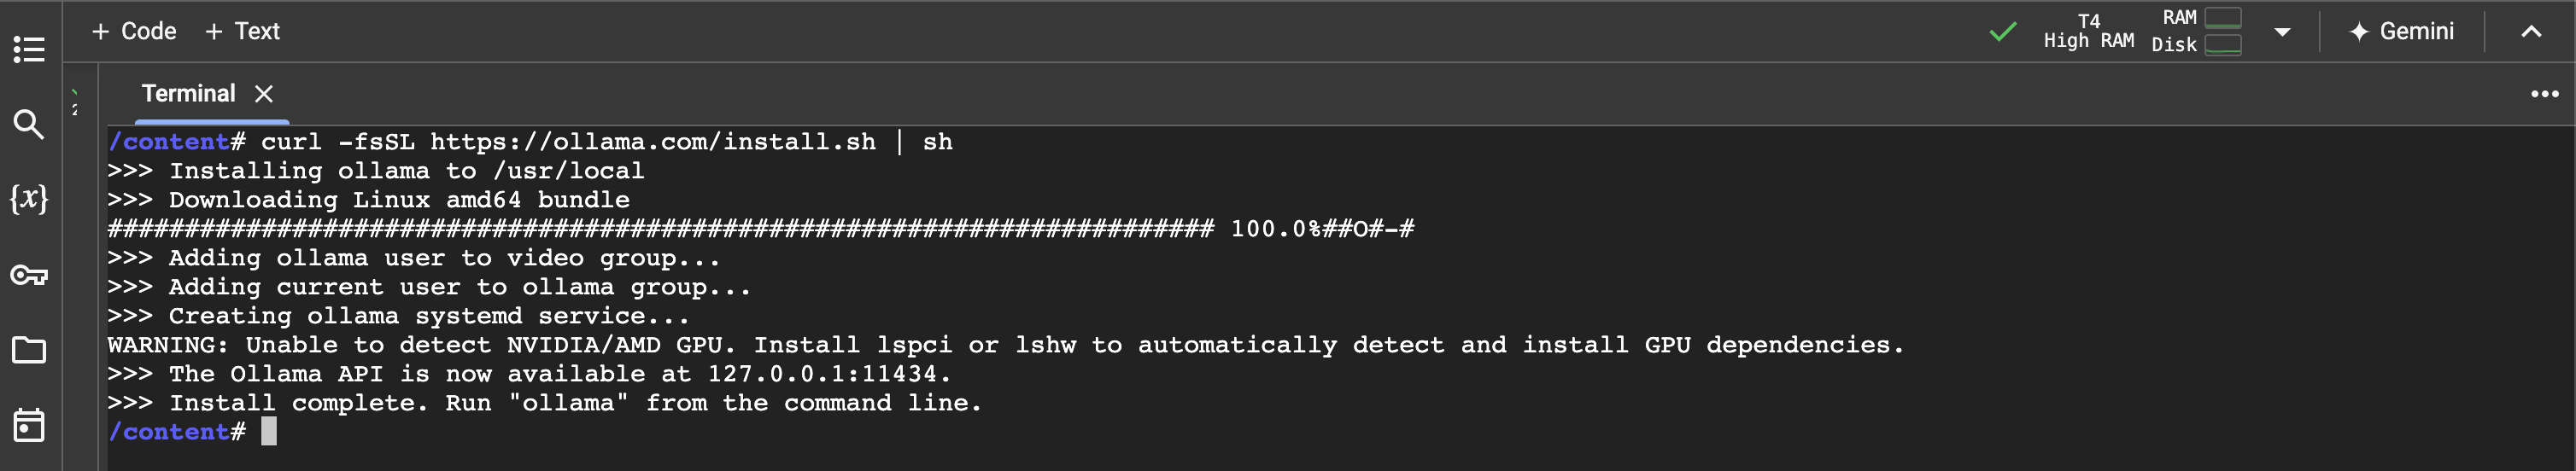



**Start Ollama from same terminal**

Use `ollama serve`
when you want to start ollama without running the desktop application.
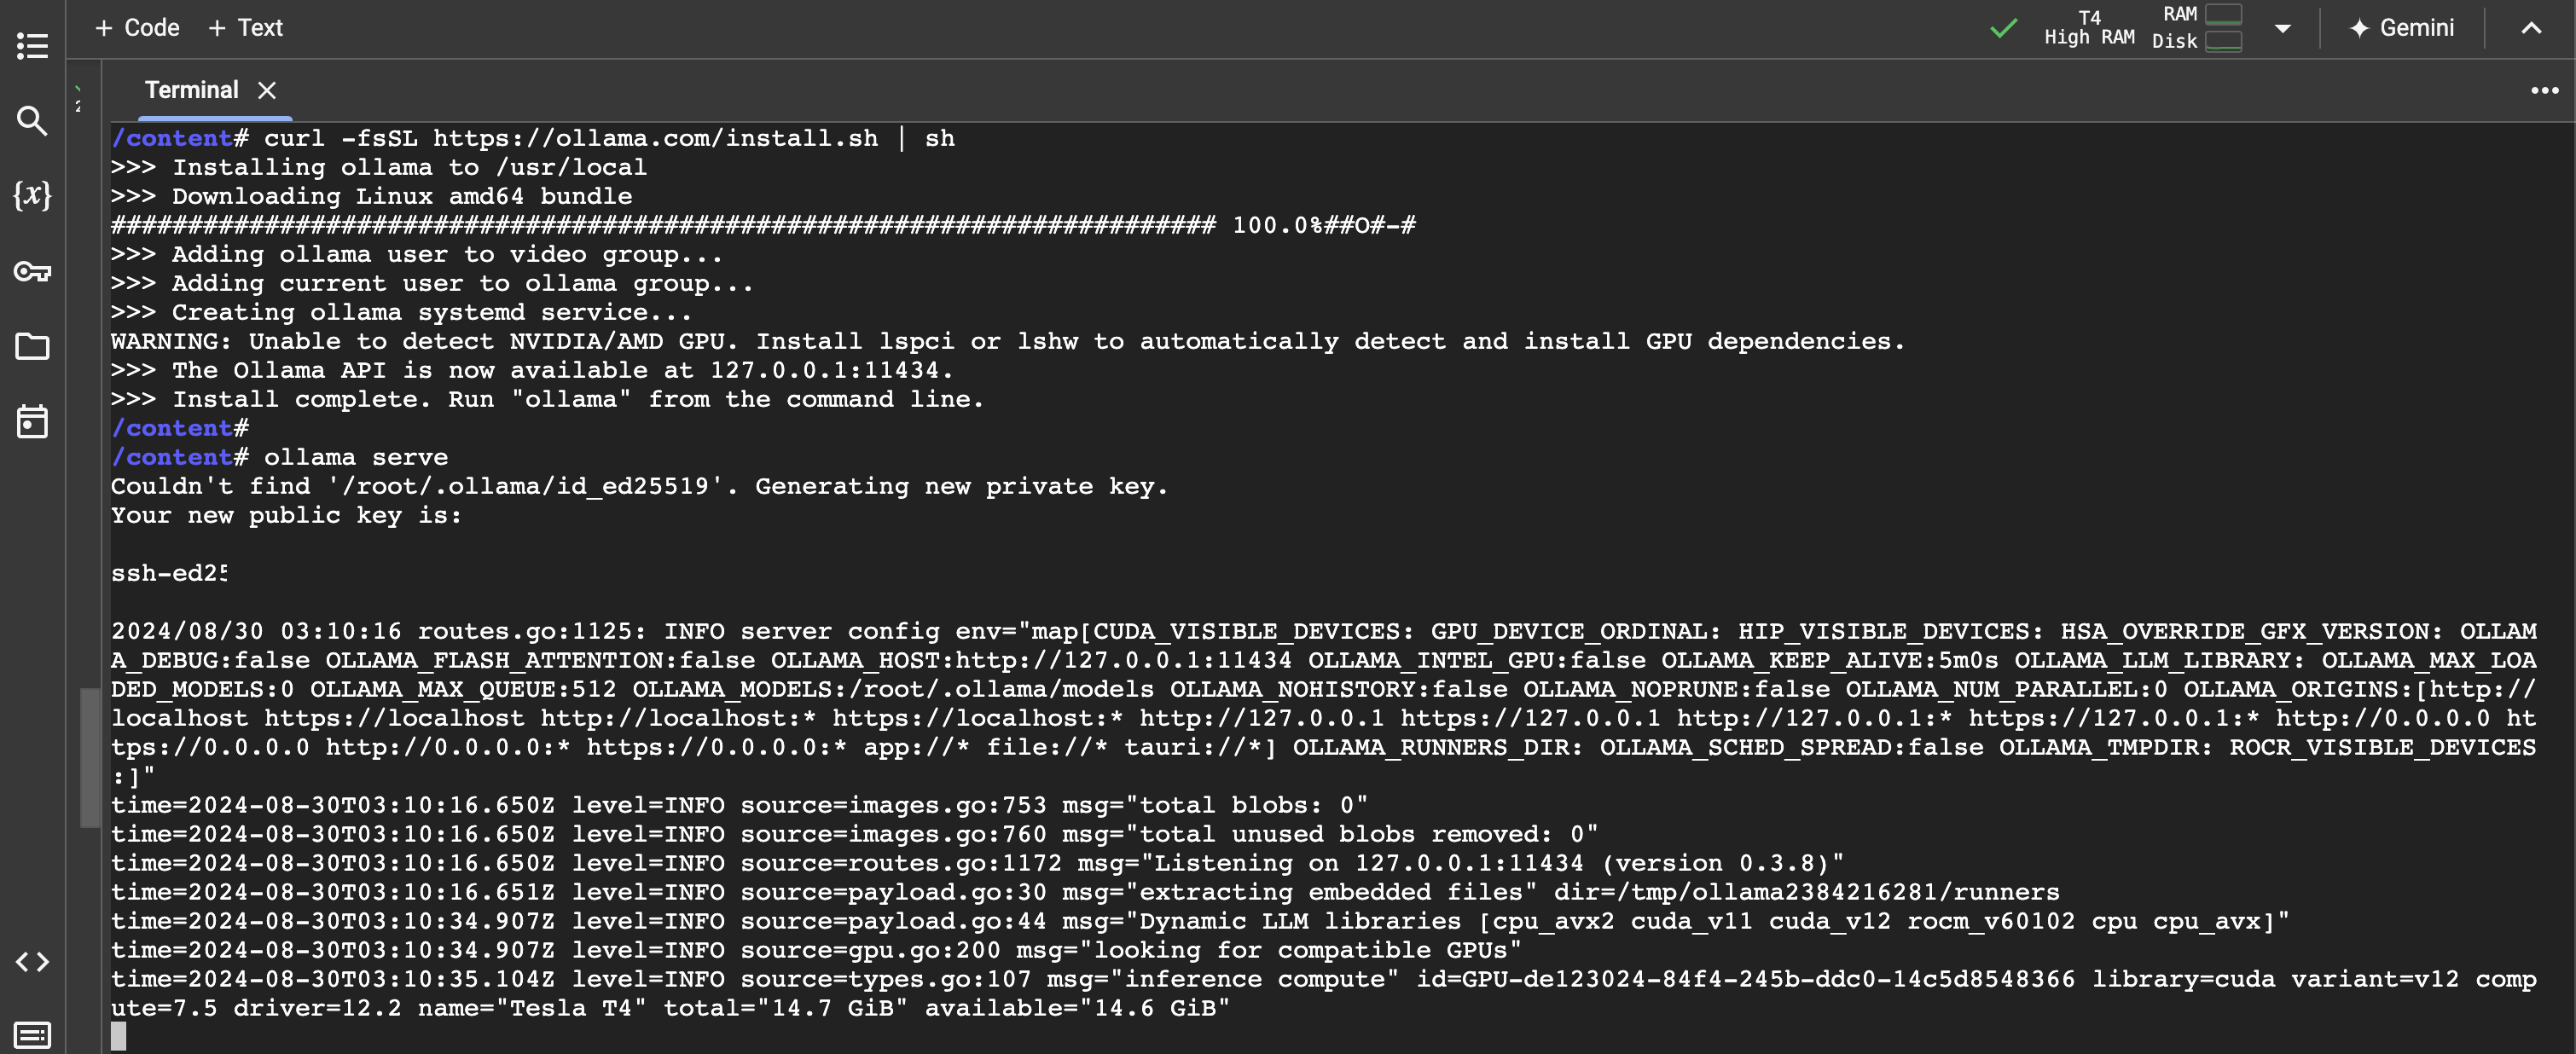


**Pull a model (gemma2, llama3.1, mistral, etc.) locally either in same terminal or here in one of the cells**

Example Models:

* `llama3.1:latest` (9B Parameters)
* `gemma2:2b` (2B Parameters)
* `gemma2` (9B Parameters)
* `gemma2:27b` (27B Parameters)
* `mistral` (9B Parameters)

In Terminal
```
ollama pull llama3.1
```

In Colab cell
```
!ollama pull llama3.1
```

In [ ]:
!ollama pull llama3.1 gemma2:2b

In [6]:
!ollama list

NAME           	ID          	SIZE  	MODIFIED       
gemma2:2b      	8ccf136fdd52	1.6 GB	42 minutes ago	
llama3.1:latest	f66fc8dc39ea	4.7 GB	55 minutes ago	


In [13]:
from llama_index.llms.ollama import Ollama

### Try prompting

**You may try using this example prompt:**

*What is the capital of Arizona? What is there to see in its Capital, Which is the closest and farthest city to the capital, what is the usual climate there and what is the best time to travel to its capital?*

In [17]:
prompt = input("Enter a prompt: ")
print(f"Prompt: {prompt}")

Enter a prompt: What is the capital of Arizona? What is there to see in its Capital, Which is the closest and farthest city to the capital, what is the usual climate there and what is the best time to travel to its capital?
Prompt: What is the capital of Arizona? What is there to see in its Capital, Which is the closest and farthest city to the capital, what is the usual climate there and what is the best time to travel to its capital?


### Local Llama 3.1 (8 Billion paramters)

Meta Llama 3, a family of models developed by Meta Inc. are available between 8B to 70B parameter sizes.

[read more](https://ollama.com/library/llama3:8b)


In [12]:
!ollama show llama3.1:latest

  Model                                          
  	arch            	llama 	                         
  	parameters      	8.0B  	                         
  	quantization    	Q4_0  	                         
  	context length  	131072	                         
  	embedding length	4096  	                         
  	                                               
  Parameters                                     
  	stop	"<|start_header_id|>"	                      
  	stop	"<|end_header_id|>"  	                      
  	stop	"<|eot_id|>"         	                      
  	                                               
  License                                        
  	LLAMA 3.1 COMMUNITY LICENSE AGREEMENT        	  
  	Llama 3.1 Version Release Date: July 23, 2024	  
  	                                               


In [25]:
llama3 = Ollama(model="llama3.1:latest", request_timeout=60.0)
resp = llama3.complete(prompt)
print(f"Prompt: {prompt}\n{'--'*60}\n{'--'*60}\nCompletion: {resp}")

Prompt: What is the capital of Arizona? What is there to see in its Capital, Which is the closest and farthest city to the capital, what is the usual climate there and what is the best time to travel to its capital?
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Completion: The capital of Arizona is Phoenix.

**Things to See in Phoenix:**

Phoenix is a vibrant city with a rich history, cultural attractions, and outdoor recreational opportunities. Some popular things to see and do in Phoenix include:

1. **Heard Museum**: Showcasing Native American art and culture.
2. **Desert Botanical Garden**: Featuring over 50,000 plants and one of the world's largest collections of cacti and succulents.
3. **Papago Park**: A large urban park with hiking trails, a botanical garden, and the Phoenix Zoo.
4. **

**Here is the formatted completion from above:**



The capital of Arizona is Phoenix.

**Things to See in Phoenix:**

Phoenix is a vibrant city with a rich history, cultural attractions, and outdoor recreational opportunities. Some popular things to see and do in Phoenix include:

1. **Heard Museum**: Showcasing Native American art and culture.
2. **Desert Botanical Garden**: Featuring over 50,000 plants and one of the world's largest collections of cacti and succulents.
3. **Papago Park**: A large urban park with hiking trails, a botanical garden, and the Phoenix Zoo.
4. **Heritage Square**: A historic district with restored buildings from the late 19th century.
5. **Camelback Mountain**: An iconic landmark with great views of the city.

**Closest City to Phoenix:**

The closest major city to Phoenix is Mesa, Arizona, which is approximately 20 miles (32 km) east of downtown Phoenix.

**Farthest City from Phoenix:**

The farthest major city from Phoenix is Yuma, Arizona, which is approximately 330 miles (531 km) west of Phoenix. However, if you consider cities outside of Arizona, the farthest would be Los Angeles, California, which is around 360 miles (579 km) northwest of Phoenix.

**Usual Climate in Phoenix:**

Phoenix has a desert climate, with hot summers and mild winters. The average high temperature in July (summer) is 104°F (40°C), while the average low temperature in January (winter) is 48°F (9°C).

**Best Time to Travel to Phoenix:**

The best time to visit Phoenix is from October to April, when the weather is generally pleasant, with mild temperatures and minimal rainfall. These months offer ideal conditions for outdoor activities like hiking, biking, or exploring the city's attractions.

Avoid visiting Phoenix during the summer months (June to August) if you're not comfortable in extreme heat. If you prefer cooler weather, visit in December or January, but be aware that it can get chilly at night.

### Local Gemma 2 (2 Billion paramters)

Gemma 2 model by Google is available in three sizes - 2B, 9B and 27B parameters.

[read more](https://ollama.com/library/gemma2)

In [29]:
!ollama show gemma2:2b

  Model                             
  	arch            	gemma2	            
  	parameters      	2.6B  	            
  	quantization    	Q4_0  	            
  	context length  	8192  	            
  	embedding length	2304  	            
  	                                  
  Parameters                        
  	stop	"<start_of_turn>"	             
  	stop	"<end_of_turn>"  	             
  	                                  
  License                           
  	Gemma Terms of Use              	  
  	Last modified: February 21, 2024	  
  	                                  


In [28]:
gemma_2b = Ollama(model="gemma2:2b", request_timeout=60.0)
resp = gemma_2b.complete(prompt)
print(f"Prompt: {prompt}\n{'--'*60}\n{'--'*60}\nCompletion: {resp}")

Prompt: What is the capital of Arizona? What is there to see in its Capital, Which is the closest and farthest city to the capital, what is the usual climate there and what is the best time to travel to its capital?
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Completion: Here's a rundown of Phoenix, Arizona's capital:

**Capital:** Phoenix, Arizona 

**What to See:**

* **Desert Botanical Garden:** A stunning showcase of desert plants from across the globe.
* **Heard Museum:**  Focuses on Native American art and culture, featuring artifacts, stories, and historical insights.
* **Phoenix Zoo:** Home to a diverse range of animals from around the world.
* **State Capitol Building:** Take a guided tour to see the beautiful architectural design and learn about Arizona's history. 
* **Tempe Town L

**Here is the formatted completion from above:**

Here's a rundown of Phoenix, Arizona's capital:

**Capital:** Phoenix, Arizona

**What to See:**

* **Desert Botanical Garden:** A stunning showcase of desert plants from across the globe.
* **Heard Museum:**  Focuses on Native American art and culture, featuring artifacts, stories, and historical insights.
* **Phoenix Zoo:** Home to a diverse range of animals from around the world.
* **State Capitol Building:** Take a guided tour to see the beautiful architectural design and learn about Arizona's history.
* **Tempe Town Lake:** Enjoy hiking, biking, kayaking, or simply relaxing by the water.  
* **Musical Instrument Museum:** Explore an extensive collection of instruments from around the world.

**Closest & Farthest Cities:**

* **Closest City (within driving distance):** Scottsdale (about 15 minutes) - Known for its upscale resorts and golf courses, beautiful desert landscapes, and art galleries.
* **Farthest City (by plane):** Los Angeles, California (2.5-hour flight)
    *  Los Angeles offers a wider range of amenities, from beaches to shopping malls to Hollywood attractions.

**Climate & Best Time to Visit:**

* **Typical Climate:** Phoenix experiences hot, dry weather year-round, with average temperatures ranging from the low 70s in winter (around February) to the high 100s during summer.
* **Best Time to Visit:** Fall and Spring (September-May) offer pleasant temperatures and are ideal for sightseeing without extreme heat or humidity.  

**Additional Tips:**
* **Pack accordingly:**  Bring water, sunscreen, and lightweight clothing when visiting.  A hat and sunglasses are a must!
* **Public Transportation:** Phoenix has a public bus system but driving is generally recommended.
* **Hiking:** The surrounding desert offers numerous hiking trails for all levels.

Have a wonderful time in Phoenix!

__________________________________________________________________________________________________________